In [56]:
! pip install qiskit==1.0.2 qiskit_aer pylatexenc

# ***Reference***: [Qiskit Quantum Paradoxes Series](https://youtube.com/playlist?list=PLOFEBzvs-VvoQP-EVyd5Di3UrPPc2YKIc&si=uocyAbh-5-_s62Am)

## Schrödinger's Cat Thought Experiment:
In the standard Schrödinger's cat scenario, the atom decays (or not) and triggers the release of poison, which then kills the cat (or not). An observer then opens the box and measures/observes the state of the cat, which is supposed to be in a superposition of alive and dead states until measured.

## Quantum Collapse (Copenhagen Interpretation):
According to this interpretation, a quantum system exists in a superposition of multiple possible states before measurement. However, when a measurement is made, the act of measurement causes the quantum system to "collapse" into one definite state out of the possible states. This collapse is a random process, and the probabilities of different outcomes are determined by the quantum mechanical wavefunction.

In [57]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, array_to_latex, plot_histogram
from qiskit.circuit.library import Initialize
from qiskit.quantum_info import random_statevector, Statevector
from qiskit.result import marginal_counts
from qiskit_aer import Aer, AerSimulator




from math import pi
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

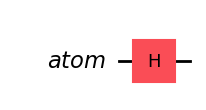

In [58]:
qr_atom = QuantumRegister(1, name='atom')
ckt = QuantumCircuit(qr_atom)
ckt.h(qr_atom)

ckt.draw("mpl")

In [59]:
# config
simulator = simulator = AerSimulator()
ckt.measure_all()
compiled_ckt = transpile(ckt, simulator)
shots = 10000

{'0': 5009, '1': 4991}


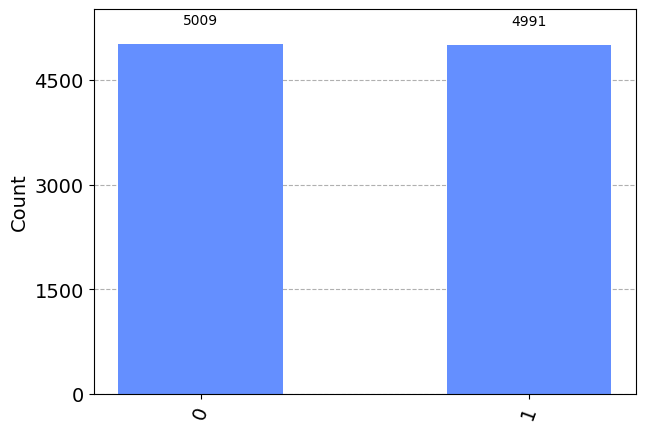

In [60]:
job = simulator.run(compiled_ckt, shots = shots)
result = job.result()
counts = result.get_counts()
print(result.get_counts())
plot_histogram(result.get_counts())

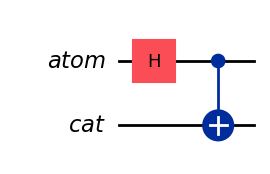

In [61]:
# atom and cat become entangled
qr_cat = QuantumRegister(1, name= 'cat')
ckt2 = QuantumCircuit(qr_atom, qr_cat)

ckt2.h(qr_atom[0])

ckt2.cx(qr_atom, qr_cat)
ckt2.draw("mpl")

{'11': 5017, '00': 4983}


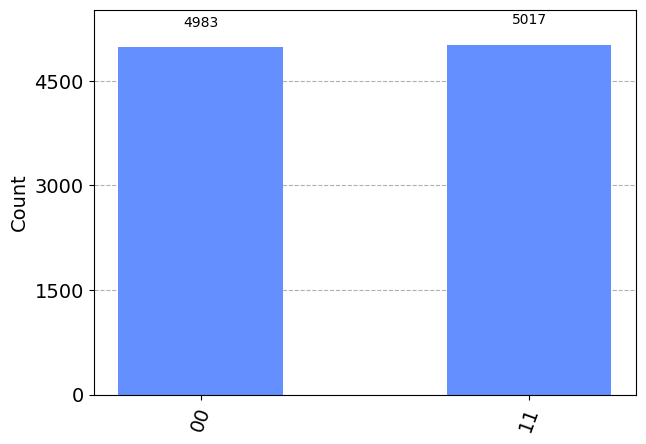

In [62]:
ckt2.measure_all()
compiled_ckt = transpile(ckt2, simulator)

job = simulator.run(compiled_ckt, shots = shots)
result = job.result()
counts = result.get_counts()
print(result.get_counts())
plot_histogram(result.get_counts())

$|\psi⟩_{atom, cat} = \frac{1}{\sqrt2}(|00⟩ + |11⟩)$

- 11 : Decayed atom and dead cat.
- 00 : Undecayed atom and alive cat.

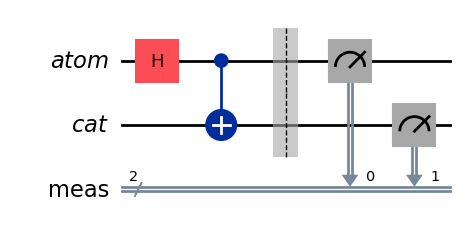

In [63]:
ckt2.draw("mpl")

## No Collapse (or the von Neumann–Wigner interpretation):
This interpretation rejects the idea of wavefunction collapse and suggests that the quantum system and the measuring apparatus should be treated as a single combined system. The superposition of states is maintained, and the measurement merely causes an entanglement between the quantum system and the apparatus, without any collapse occurring.

When we (observer) look at the box to see if the cat is alive or dead and the cat become dead or stay alive, we become entangled with the cat. So we become a part of the system.

The Everettian (Many-Worlds) interpretation extends this idea further by suggesting that the universe itself splits into multiple branches or "parallel universes" during a measurement process. Each possible outcome of the measurement is realized in a separate branch of the universe, and the observer's consciousness follows only one of these branches.

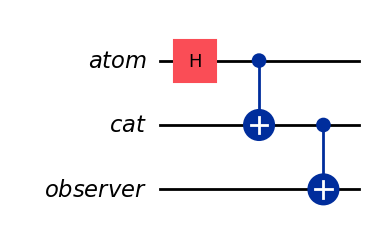

In [64]:
qr_observer = QuantumRegister(1, name='observer')
ckt3 = QuantumCircuit(qr_atom, qr_cat, qr_observer)

ckt3.h(qr_atom)
ckt3.cx(qr_atom, qr_cat)
ckt3.cx(qr_cat, qr_observer)
ckt3.draw("mpl")

<table>
<tr><th>Atom</th><th>Cat</th><th>Observer</th></tr>
<tr><td>0</td><td>0</td><td>0</td></tr>
<tr><td>1</td><td>1</td><td>1</td></tr>
</table>

- The observer memory(1) finds the cat is dead(1) because the atom was decayed(1)
- vice versa

{'111': 5032, '000': 4968}


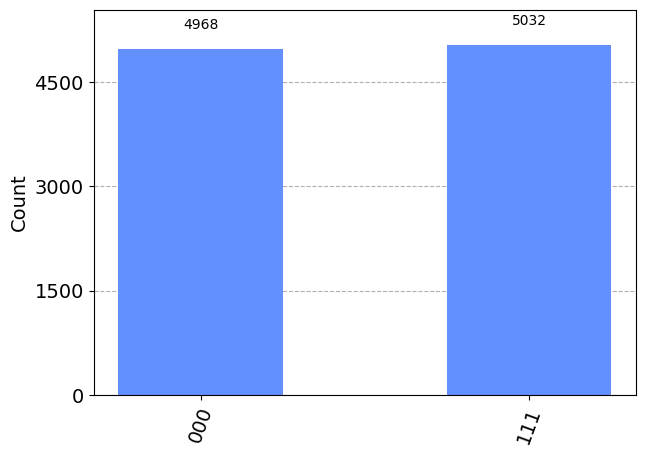

In [65]:
ckt3.measure_all()
compiled_ckt = transpile(ckt3, simulator)

job = simulator.run(compiled_ckt, shots = shots)
result = job.result()
counts = result.get_counts()
print(result.get_counts())
plot_histogram(result.get_counts())

## Coherence and Decoherence
A coherent quantum state refers to a pure superposition state of a quantum system.

Decoherence: If the observer really is entering an entangled superposition, then why do they and the rest of the world around them only see one outcome?

Decoherence is a process that explains how the coherent superposition of quantum states becomes effectively incoherent
due to the interaction of the quantum system with its environment. It does not involve a true collapse of the wavefunction,
but rather a loss of coherence between the different states in the superposition.

When a quantum system interacts with its environment (e.g., air molecules, thermal vibrations, etc.),
the system and the environment become entangled. As a result, the different components of the superposition evolve in different ways,
leading to a rapid loss of interference between these components. This process effectively "destroys" the coherence between the
different states in the superposition, making the system appear to behave classically.

It is called decoherence because the atom, cat, and observer lose their Quantum Coherence once they interact with the environment.

Maintaining coherence over long periods and protecting quantum systems from decoherence is a significant challenge in realizing
practical quantum technologies. Various techniques, such as error correction, quantum control, and careful isolation from the environment,
are employed to preserve coherence and enable the observation and exploitation of quantum effects.


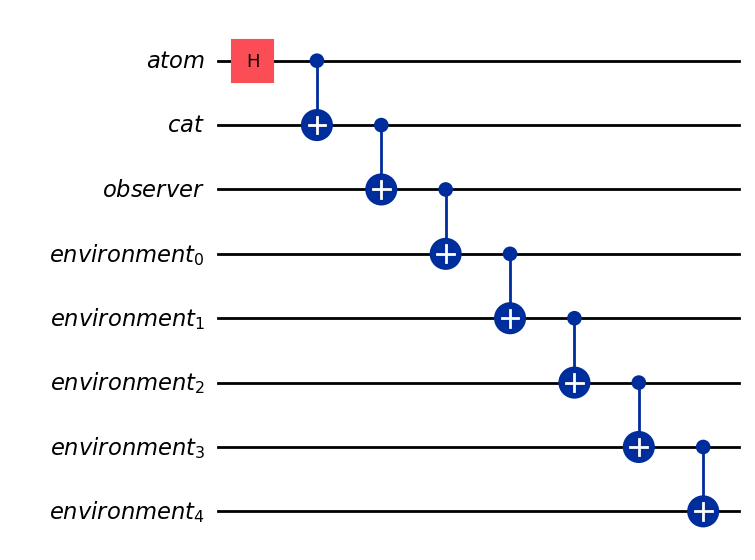

In [66]:
qr_env = QuantumRegister(5, name='environment')

ckt4 = QuantumCircuit(qr_atom, qr_cat, qr_observer, qr_env)

ckt4.h(qr_atom[0])

ckt4.cx(qr_atom, qr_cat)

ckt4.cx(qr_cat[0], qr_observer[0])

ckt4.cx(qr_observer, qr_env[0])
ckt4.cx(qr_env[0], qr_env[1])
ckt4.cx(qr_env[1], qr_env[2])
ckt4.cx(qr_env[2], qr_env[3])
ckt4.cx(qr_env[3], qr_env[4])

ckt4.draw("mpl")

{'00000000': 5033, '11111111': 4967}


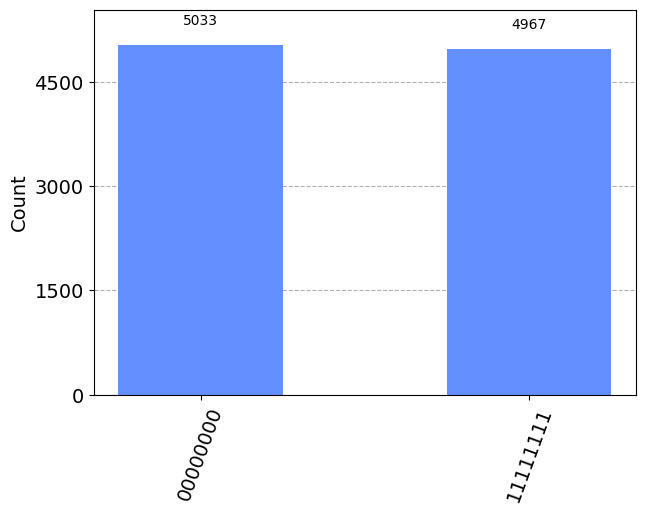

In [67]:
ckt4.measure_all()
compiled_ckt = transpile(ckt4, simulator)

job = simulator.run(compiled_ckt, shots = shots)
result = job.result()
counts = result.get_counts()
print(result.get_counts())
plot_histogram(result.get_counts())

## Deferred Measurement
 Imagine a scenario where the cat measured the atom first before the observer measures the cat.

 Deferred measurement or delayed measurement is a concept in quantum mechanics that describes a situation where a quantum system is initially measured but the result of that measurement is not immediately observed or recorded. In a deferred measurement scenario, the quantum system is first measured and entangled with a quantum memory or ancilla system. This ancilla system preserves the information about the measurement outcome without revealing it. The original quantum system and the ancilla are then allowed to evolve together according to the Schrödinger equation, maintaining their entangled state.

 In the deferred measurement:


1.   Initially, the atom decays/doesn't decay, releasing/not releasing the poison.
2. The cat, instead of immediately dying or staying alive, acts as the "ancilla" or quantum memory to record/measure the state of the atom's decay without revealing it.
3. So now the cat is in an entangled superposition state with the atom's decay state, but its actual alive/dead state is not yet defined.
4. This entangled cat+atom system then evolves together for some time according to quantum laws.
5. Only after this delay, does an observer measure the state of the cat, which finally reveals ("defers" the readout of) the atom's original decayed or not-decayed state.

So in this deferred version, the cat effectively "measures" and records the atom's state first, before the observer eventually makes the measurement on the cat to learn what the atom did.

This delays or "defers" the usual wavefunction collapse, separating the initial measurement from the readout of that measurement result by the observer.

The point is to explore whether measurement alone causes collapse, or if conscious observation of the measurement outcome is required, by introducing this delay between measurement and observation.


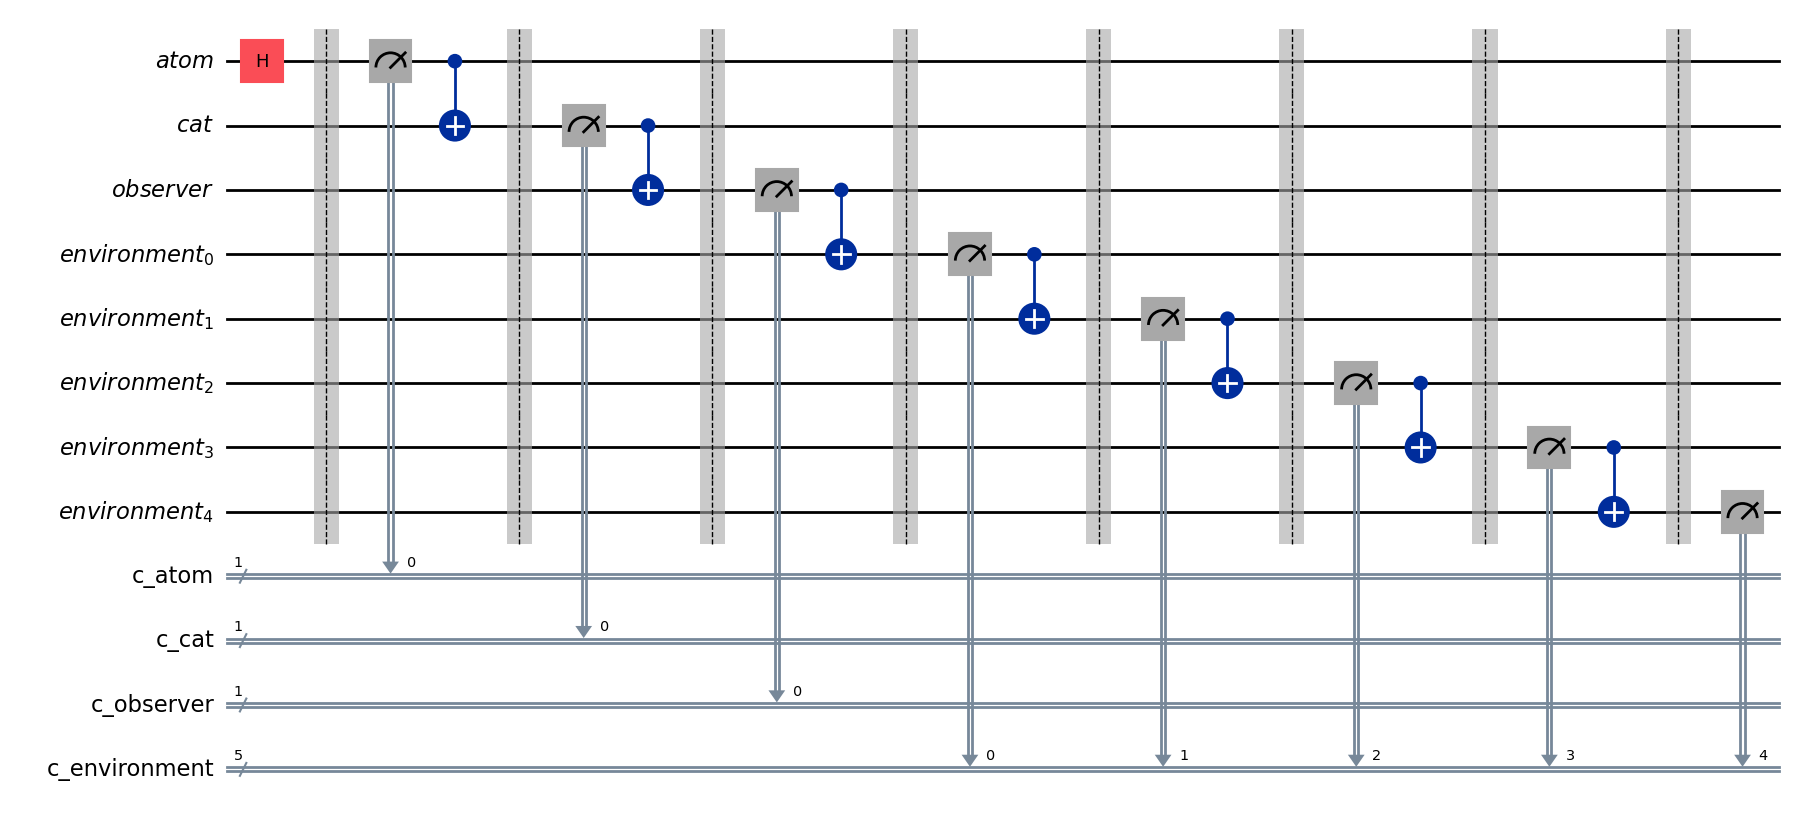

In [68]:
cr_atom = ClassicalRegister(1, name='c_atom')
cr_cat = ClassicalRegister(1, name='c_cat')
cr_observer = ClassicalRegister(1, name='c_observer')
cr_env = ClassicalRegister(5, name='c_environment')

ckt5 = QuantumCircuit(qr_atom, qr_cat, qr_observer, qr_env, cr_atom, cr_cat, cr_observer, cr_env)

ckt5.h(qr_atom[0])

ckt5.barrier()
ckt5.measure(qr_atom[0], cr_atom[0])

ckt5.cx(qr_atom, qr_cat)

ckt5.barrier()
ckt5.measure(qr_cat[0], cr_cat[0])

ckt5.cx(qr_cat[0], qr_observer[0])

ckt5.barrier()
ckt5.measure(qr_observer[0], cr_observer[0])
ckt5.cx(qr_observer[0], qr_env[0])

for i in range(4):
    ckt5.barrier()
    ckt5.measure(qr_env[i], cr_env[i])
    ckt5.cx(qr_env[i], qr_env[i+1])

ckt5.barrier()
ckt5.measure(qr_env[4], cr_env[4])
ckt5.draw("mpl")

{'00000 0 0 0': 5036, '11111 1 1 1': 4964}


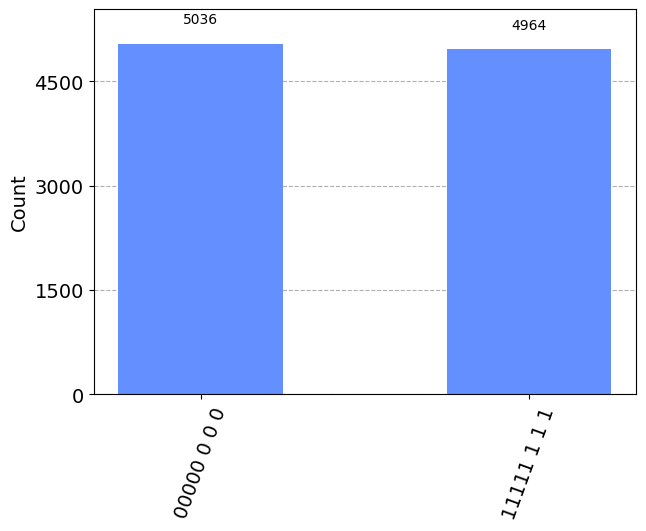

In [69]:
compiled_ckt = transpile(ckt5, simulator)

job = simulator.run(compiled_ckt, shots = shots)
result = job.result()
counts = result.get_counts()
print(result.get_counts())
plot_histogram(result.get_counts())

The indistinguishability of collapse and no-collapse: The measurement outcomes are the same as what we would see without the measurements before the CNOT gates, i.e., all 0 or all 1: